# H1N1 AND SEASONAL FLU VACCINES PROJECT

## 1. PROJECT UNDERSTANDIMG

### Overview
This project addresses the challenge of suboptimal seasonal flu vaccine uptake, a critical public health issue that exacerbates morbidity, mortality, and economic burden annually. Using data from the National 2009 H1N1 Flu Survey, which includes demographic, behavioral, and attitudinal factors, the project aims to build a predictive model to identify key drivers of vaccine uptake. Framed as a binary classification problem, the analysis seeks to uncover actionable insights to inform public health strategies, improve vaccination campaigns, and enhance preparedness for future pandemics.

### Problem Statement
Seasonal influenza vaccination is a cornerstone of public health efforts to reduce the burden of flu-related illness. However, vaccination rates vary significantly across different population groups, influenced by factors such as demographics, health behaviors, and personal beliefs. Public health officials face the challenge of designing targeted interventions to improve vaccine uptake, particularly among populations with historically low vaccination rates.

### Key objectives include:
1. Identifying Predictors: Determine the most influential factors driving seasonal flu vaccine uptake.
2. Building a Predictive Model: Develop a binary classification model to predict vaccination status accurately.
3. Actionable Insights: Provide evidence-based recommendations to public health officials for improving seasonal flu vaccination rates.

### This project addresses the following question:

Can we predict whether an individual received the seasonal flu vaccine based on their demographic characteristics, health behaviors, and opinions about vaccines?

### Metric of Success
By achieving these objectives, the project will contribute to a deeper understanding of vaccination behavior and inform public health campaigns to increase seasonal flu vaccine coverage. These insights can also be applied to improve public confidence in vaccines and enhance overall population health.

## 2. DATA UNDERSTANDING

##### Below we load the libraries that we'll need for our project

In [402]:
# Data manipulation and analysis
import pandas as pd  # For handling and manipulating structured data (DataFrames).
import numpy as np  # For numerical operations and handling arrays.

# Data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive plots.
import seaborn as sns  # For advanced and aesthetically pleasing data visualizations.

# Warnings management
import warnings  # To manage and suppress unnecessary warnings during execution.
warnings.filterwarnings('ignore')  # Suppress warnings to keep output clean.

# Statistical analysis
from scipy.stats import norm  # For working with probability distributions, e.g., Normal distribution.
from scipy import stats  # For statistical functions like hypothesis testing and descriptive statistics.

# Multicollinearity diagnostics
from statsmodels.stats.outliers_influence import variance_inflation_factor  # To calculate Variance Inflation Factor (VIF) for multicollinearity detection.

# Data preprocessing
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables into numerical format.
from sklearn.preprocessing import StandardScaler  # For scaling features to standardize them (mean=0, std=1).

# Train-test split
from sklearn.model_selection import train_test_split  # To split data into training and testing sets.

# Machine learning models
from sklearn.linear_model import LogisticRegression  # Logistic Regression for binary classification tasks.
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors for classification.
from sklearn.ensemble import RandomForestClassifier  # Random Forest for robust ensemble-based classification.
from sklearn.tree import DecisionTreeClassifier  # Decision Tree for classification.
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes for probabilistic classification.
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting for powerful ensemble learning.

# Model tuning and evaluation
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search.
from sklearn.metrics import (  # For evaluating model performance.
    accuracy_score,  # Accuracy: Ratio of correctly predicted instances.
    precision_score,  # Precision: Ratio of true positives to predicted positives.
    recall_score,  # Recall: Ratio of true positives to actual positives.
    f1_score,  # F1 Score: Harmonic mean of precision and recall.
    log_loss  # Logarithmic loss for evaluating probabilities in classification.
)

# Statistical modeling
import statsmodels.api as sm  # For detailed statistical modeling and diagnostics.

# Metrics for model evaluation
from sklearn import metrics  # General metrics module for evaluation tasks (e.g., confusion matrix, ROC-AUC).

# Ensure inline plotting for Jupyter Notebook
# Ensures that plots are displayed directly in the notebook.
%matplotlib inline

##### Now we load our data sets

In [403]:
#load the data sets
test_data = pd.read_csv("test_set_features.csv")
train_data = pd.read_csv("training_set_features.csv")
train_data_labels = pd.read_csv("training_set_labels.csv")

The data in use is from [Datadriven](https://www.drivendata.org/competitions/66/flu-shot-learning/data/) made up of 26707 rows and 36 columns(12 categorical columns and 24 are numerical.)
Namely:
- 'respondent_id'- Unique id
- 'h1n1_concern'- the concern one has about the virus. 
- 'h1n1_knowledge'- knowledge they have about the H1N1 virus.
- 'behavioral_antiviral_meds'- If they believe in anti-vaccination.
- 'behavioral_avoidance'-do they avoid roaming in public.
- 'behavioral_face_mask'- do they wear a face mask.
- 'behavioral_wash_hands'- do they regularly wash their hands.
- 'behavioral_large_gatherings'- do they tend to be in gatherings.
- 'behavioral_outside_home'- are they usually outdoors.
- 'behavioral_touch_face'- do they touch their faces often.
- 'doctor_recc_h1n1'- 
- 'doctor_recc_seasonal',
- 'chronic_med_condition', 
- 'child_under_6_months', 
- 'health_worker',
- 'health_insurance',
- 'opinion_h1n1_vacc_effective', 
- 'opinion_h1n1_risk',
- 'opinion_h1n1_sick_from_vacc',
- 'opinion_seas_vacc_effective',
- 'opinion_seas_risk',
- 'opinion_seas_sick_from_vacc',
- 'age_group'- their age group.
- 'education'- level of education 
- 'race'- their race
- 'sex' - their gender
- 'income_poverty'- 
- 'marital_status'- whether they are married or not.
- 'rent_or_own'- if they rent or own a house.
- 'employment_status'- whether they are employed
- 'hhs_geo_region',
- 'census_msa'- geographical region
- 'household_adults'-number of adults in the house.
- 'household_children'-number of children in the house.
- 'employment_industry'-industr of employment.
- 'employment_occupation'- what they do for a living.

##### External Data Source Validation
The Centers for Disease Control and Prevention (CDC) estimates that each year, on average, 5% to 20% of the U.S. population contracts the flu, resulting in about 31.4 million outpatient visits and more than 200,000 hospitalizations.Each year, seasonal flu is estimated to cause between 12,000 and 61,000 deaths in the U.S. alone. The exact number of deaths is difficult to determine because many people who die from flu-related complications also have other underlying health conditions.The seasonal flu is a global public health issue, affecting millions of people worldwide each year. According to the World Health Organization, the flu is responsible for 3-5 million cases of severe illness and between 290,000 and 650,000 deaths annually.
> This can be seen further [here](https://www.cdc.gov/nchs/index.htm)

##### Exploring our datasets

In [404]:
#display the first 5 rows of our training data
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [405]:
#check data set info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [406]:
#Determining the number of records in our train data dataset
train_data.shape

(26707, 36)

Our `train_data` dataset has 36 columns and 26707 rows

In [407]:
#display the first 5 rows of our test data
test_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [408]:
#check data set info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [409]:
#Determining the number of records in our test data dataset
test_data.shape

(26708, 36)

Our `test_data` dataset has 36 columns and 26708 rows

In [410]:
#display the first 5 rows of our training data labels
train_data_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [411]:
#check data set info
train_data_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [412]:
#Determining the number of records in our train data labels dataset
train_data_labels.shape

(26707, 3)

Our `train_data_labels` dataset has 3 columns and 26707 rows

In [413]:
#Exploring the descriptive statistics of the variables 
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,NaN,NaN,NaN,13353.0,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,NaN,NaN,NaN,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,NaN,NaN,NaN,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,NaN,NaN,NaN,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,NaN,NaN,NaN,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,NaN,NaN,NaN,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,NaN,NaN,NaN,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,NaN,NaN,NaN,0.35864,0.47961,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,NaN,NaN,NaN,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,NaN,NaN,NaN,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


### Cleaning the Data Set

Below we check for missing values in our data

In [414]:
#Identifying the missing data
train_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

> As seen the only columns with no missing values are the id,age group,race,sex,and locations( hhs_geo_region,   census_msa ).
> The last 2 columns have almost 50% missing data.

In [415]:
#dropping irrelevant columns
drop_columns = ["hhs_geo_region","employment_occupation","employment_industry","health_insurance"]
train_data.drop(drop_columns,axis=1, inplace=True)

In [416]:
#confirm the columns have been dropped.
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [417]:
#Dropping rows with missing values
train_data.dropna(inplace=True)

In [418]:
#confirming the rows with missing values have been dropped
train_data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa                     0
household_

Below we check for duplicates in our data

In [419]:
#Identifying duplicated data.
train_data.duplicated().sum()

0

There are no duplicates in the data set.

In [420]:
#confirm the columns have been dropped.
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0


## Exploratory Data Analysis

### Univariate analysis

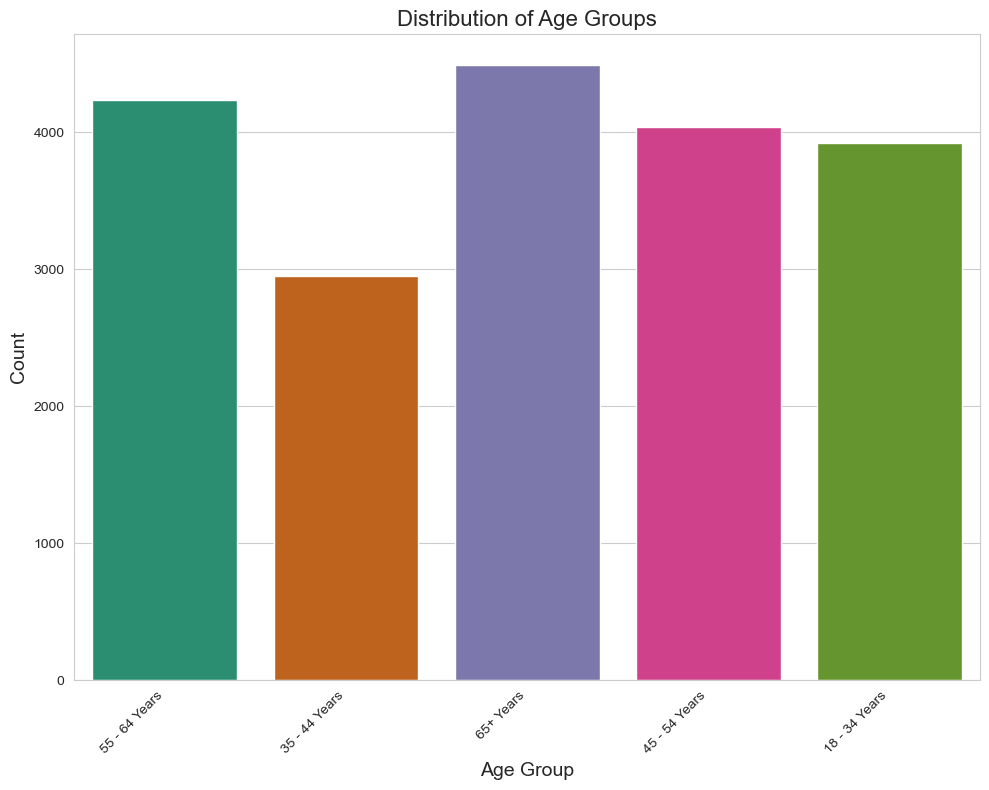

In [421]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="age_group", data=train_data, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of Age Groups", fontsize=16)
ax.set_xlabel("Age Group", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability (if needed)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("agegroup.png")

# Show the plot
plt.show()

> Most of the respondents were older than 65 years.

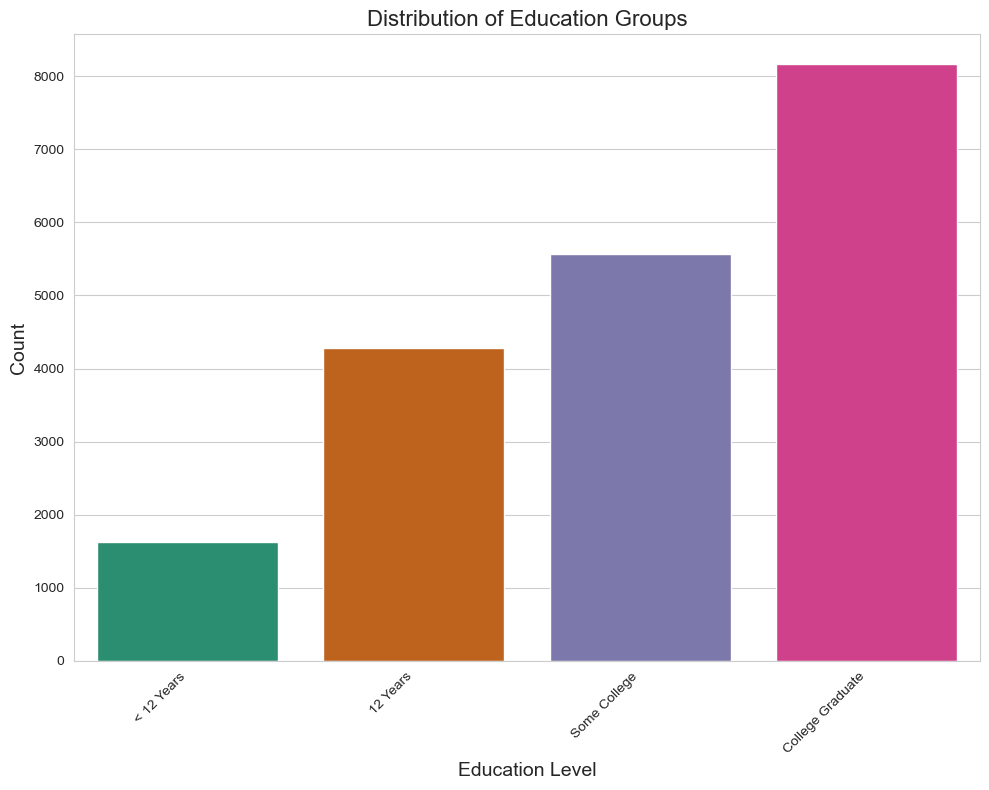

In [422]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="education", data=train_data, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of Education Groups", fontsize=16)
ax.set_xlabel("Education Level", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability (if needed)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("education.png")

# Show the plot
plt.show()

> The majority number of respondents were college graduates.

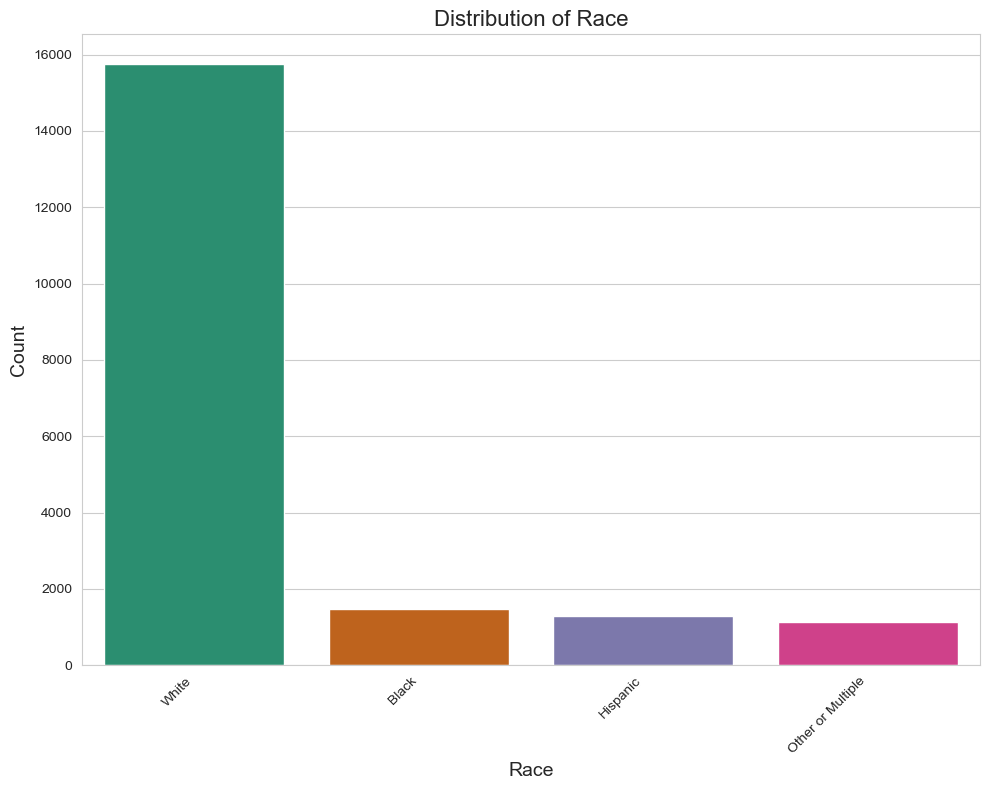

In [423]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="race", data=train_data, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of Race", fontsize=16)
ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability (if needed)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("race.png")

# Show the plot
plt.show()

> Most of the respondents were caucasians.

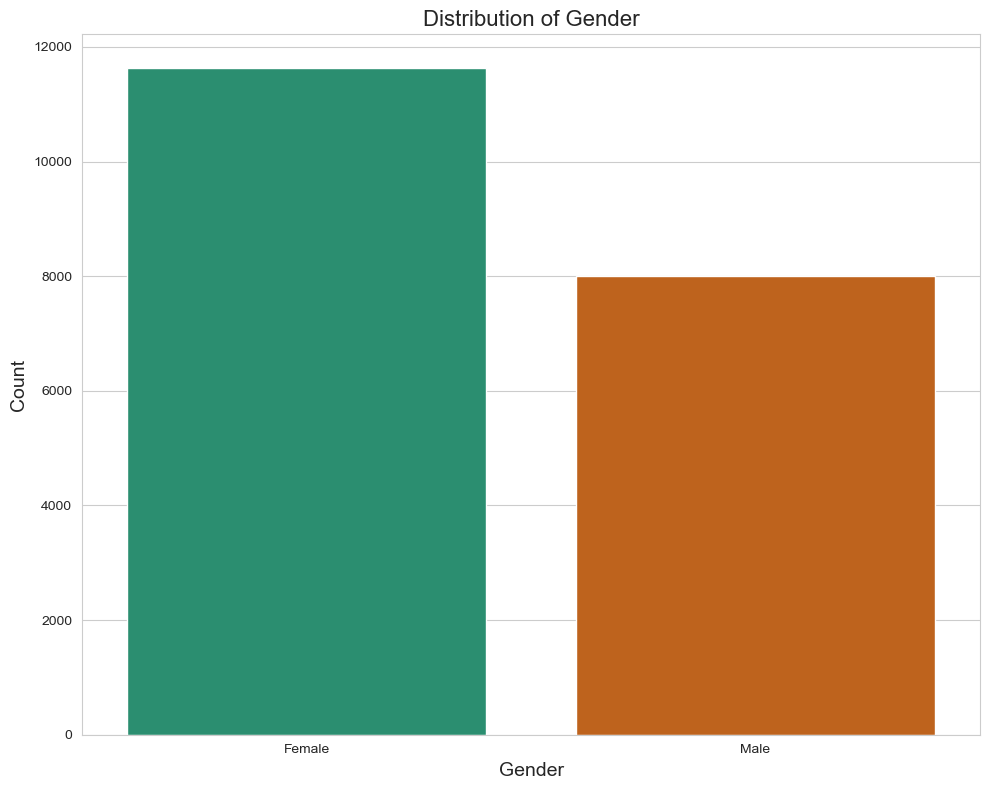

In [424]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="sex", data=train_data, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of Gender", fontsize=16)
ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability (if needed)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("sex.png")

# Show the plot
plt.show()

> Most of the respondents were female.

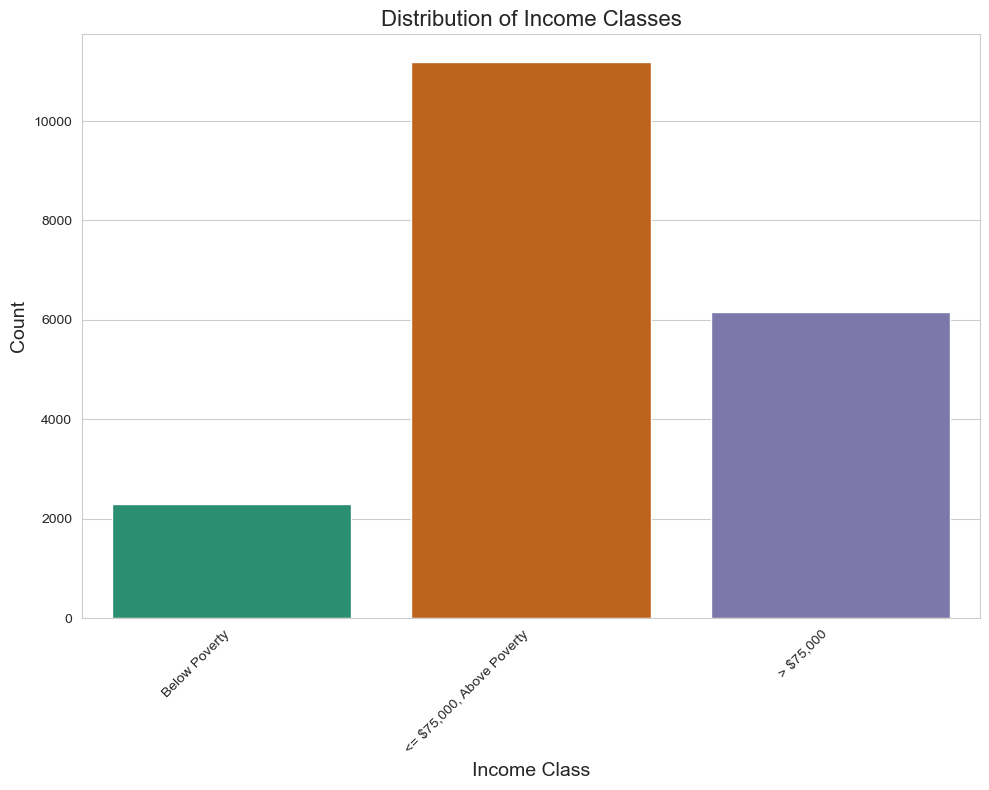

In [425]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="income_poverty", data=train_data, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of Income Classes", fontsize=16)
ax.set_xlabel("Income Class", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability (if needed)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("income.png")

# Show the plot
plt.show()

> Most respondents were above the income poverty line.

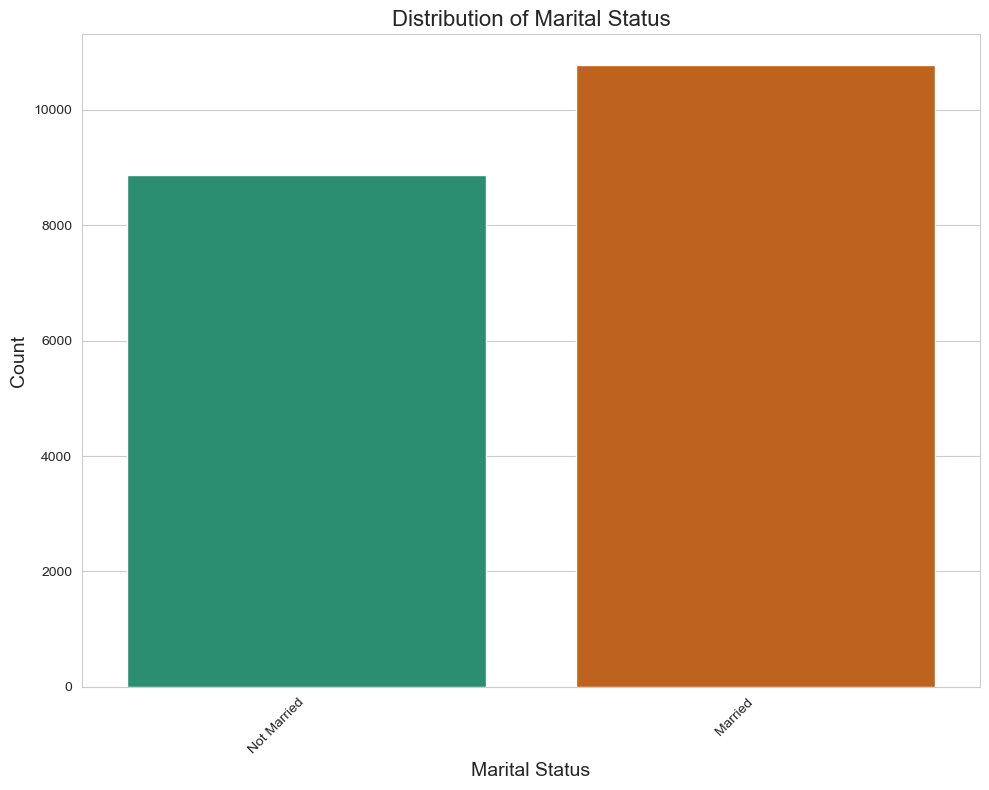

In [426]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="marital_status", data=train_data, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of Marital Status", fontsize=16)
ax.set_xlabel("Marital Status", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("maritalstatus.png")

# Show the plot
plt.show()

> Most of the respondents were married.

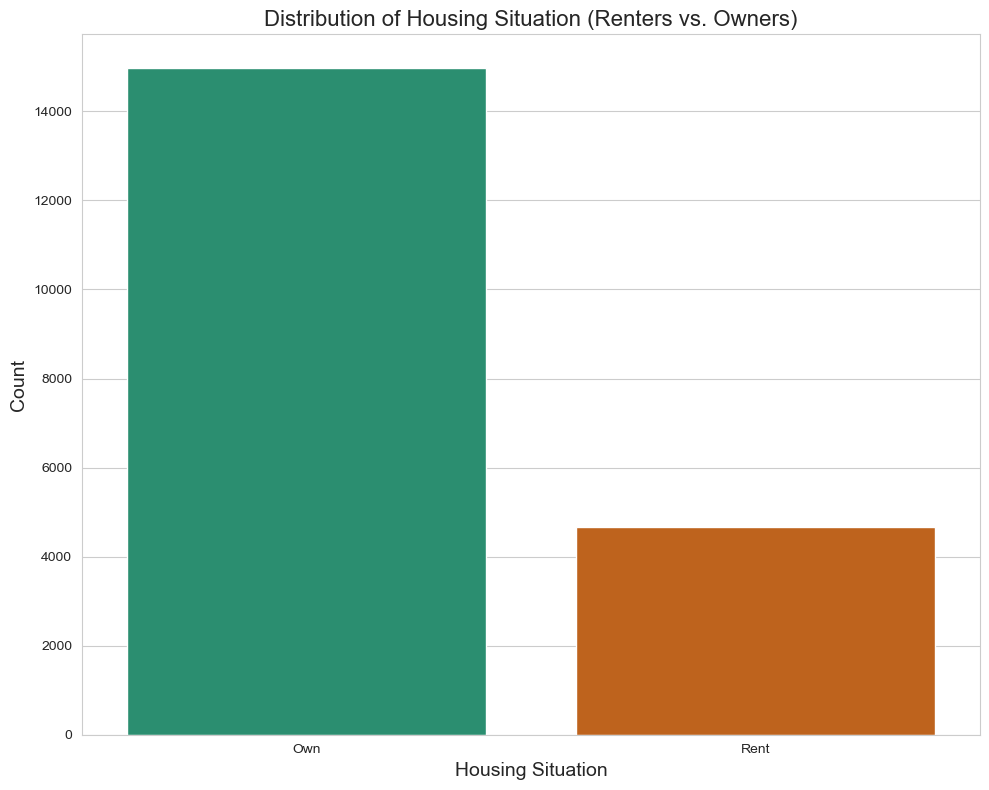

In [427]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="rent_or_own", data=train_data, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of Housing Situation (Renters vs. Owners)", fontsize=16)
ax.set_xlabel("Housing Situation", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability (if needed)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("rentown.png")

# Show the plot
plt.show()

> Most of the respondents were home owners.

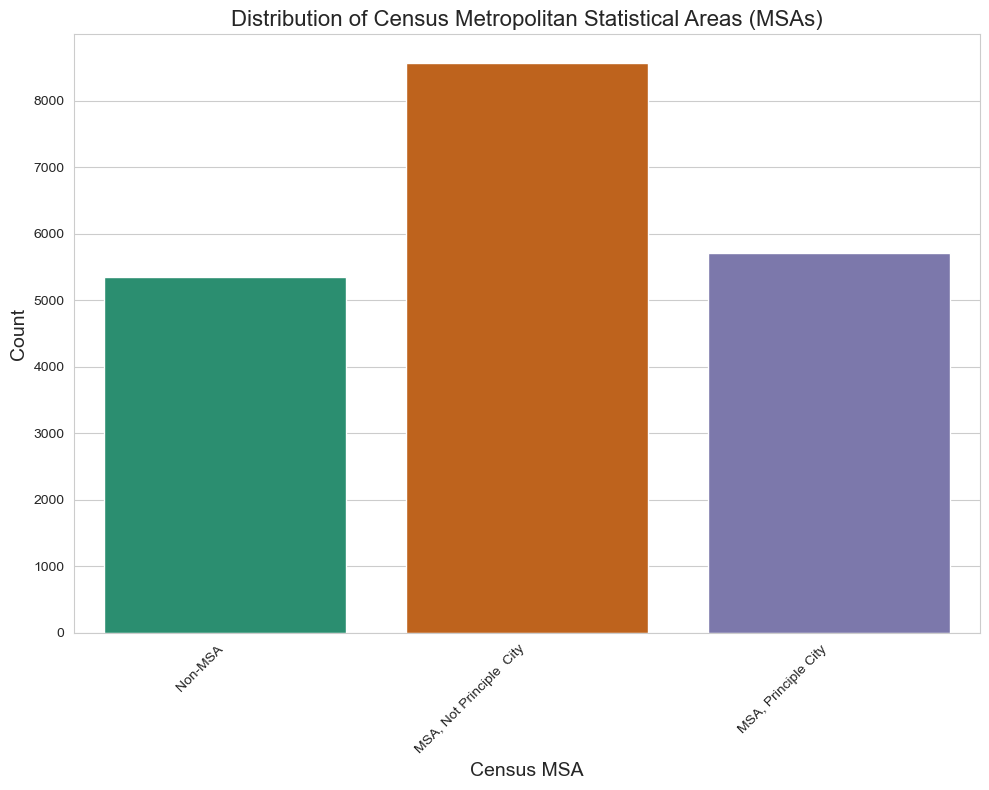

In [428]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="census_msa", data=train_data, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of Census Metropolitan Statistical Areas (MSAs)", fontsize=16)
ax.set_xlabel("Census MSA", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability (if needed)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("census_msa.png")

# Show the plot
plt.show()

> Most of the respondents were in the MSA,but not the priciple city.

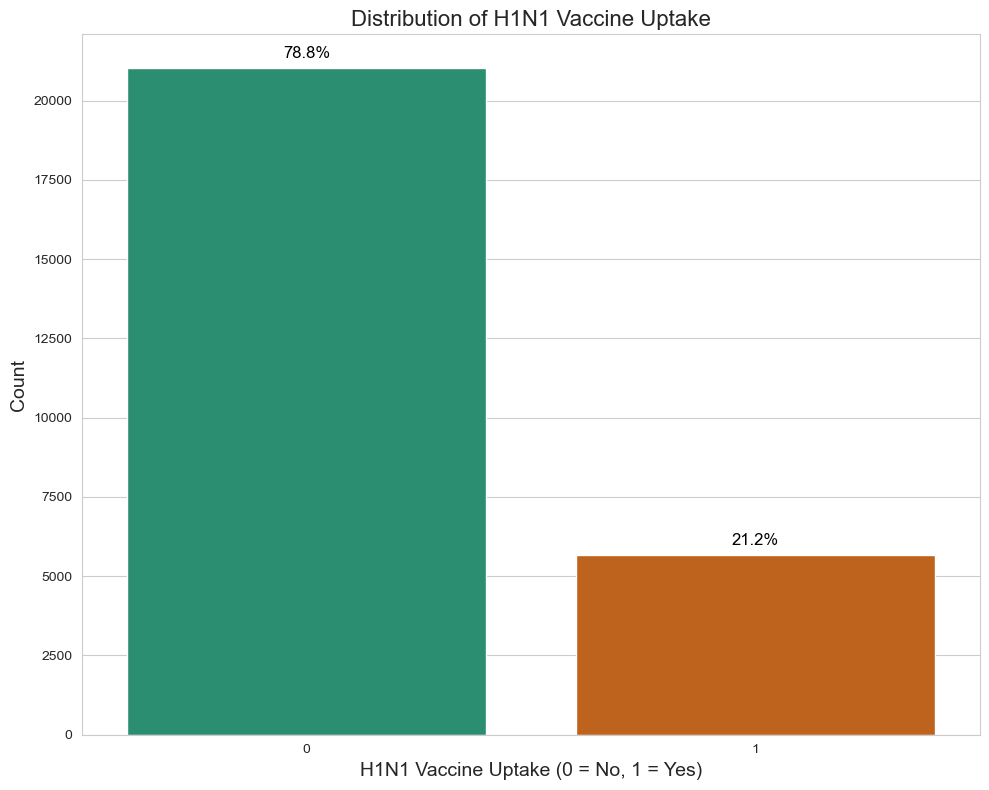

In [429]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="h1n1_vaccine", data=train_data_labels, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of H1N1 Vaccine Uptake", fontsize=16)
ax.set_xlabel("H1N1 Vaccine Uptake (0 = No, 1 = Yes)", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Add percentage annotations on the bars
total = len(train_data_labels)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("h1n1vacc.png")

# Show the plot
plt.show()

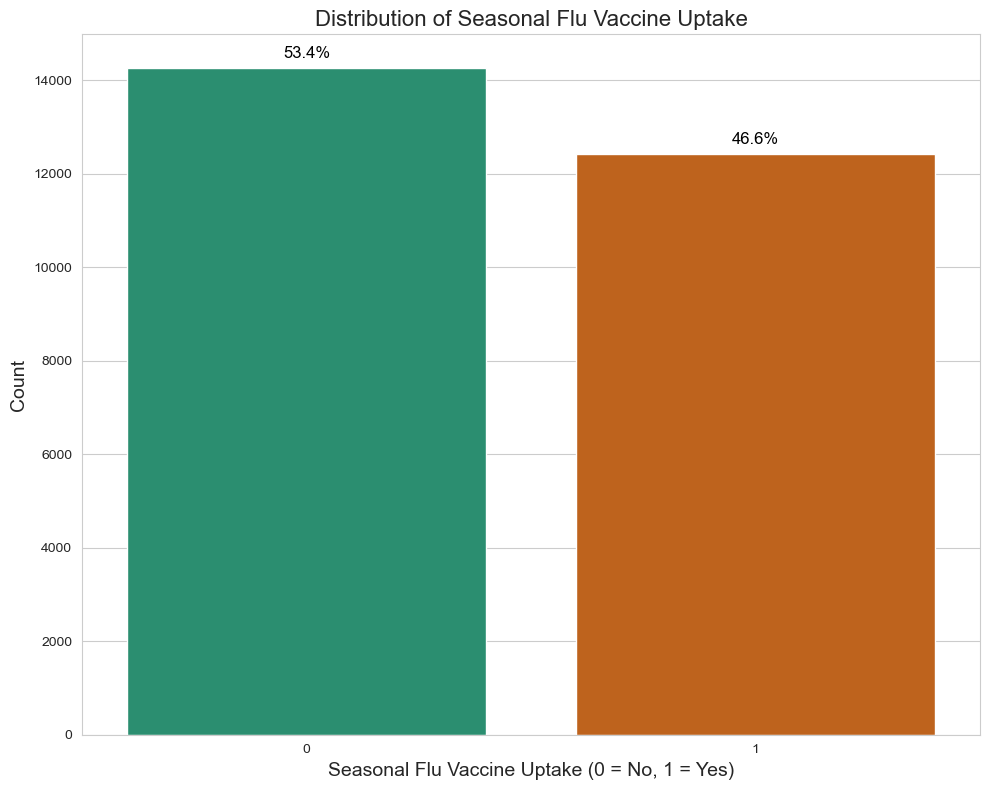

In [430]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x="seasonal_vaccine", data=train_data_labels, palette="Dark2")

# Add titles and labels
ax.set_title("Distribution of Seasonal Flu Vaccine Uptake", fontsize=16)
ax.set_xlabel("Seasonal Flu Vaccine Uptake (0 = No, 1 = Yes)", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Add percentage annotations on the bars
total = len(train_data_labels)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Save the plot as an image
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("seasonalvacc.png")

# Show the plot
plt.show()


> As seen,seasonal flu vaccine target variable has balanced classes in comparison to h1n1 flu vaccine target variable.

### Multivariate Analysis
> Since in the multivariate analysis,we want to compare our variables to our target variable,we will have to join 
train_data dataframe and train_data_labels data frame.

### Joining the data sets.


In [431]:
combined_train = pd.merge(train_data,train_data_labels,on = "respondent_id")
combined_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
3,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
4,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0,0


#### The chosen target variable is the seasonal flu vaccine.All visualizations made below will be in respect to that.

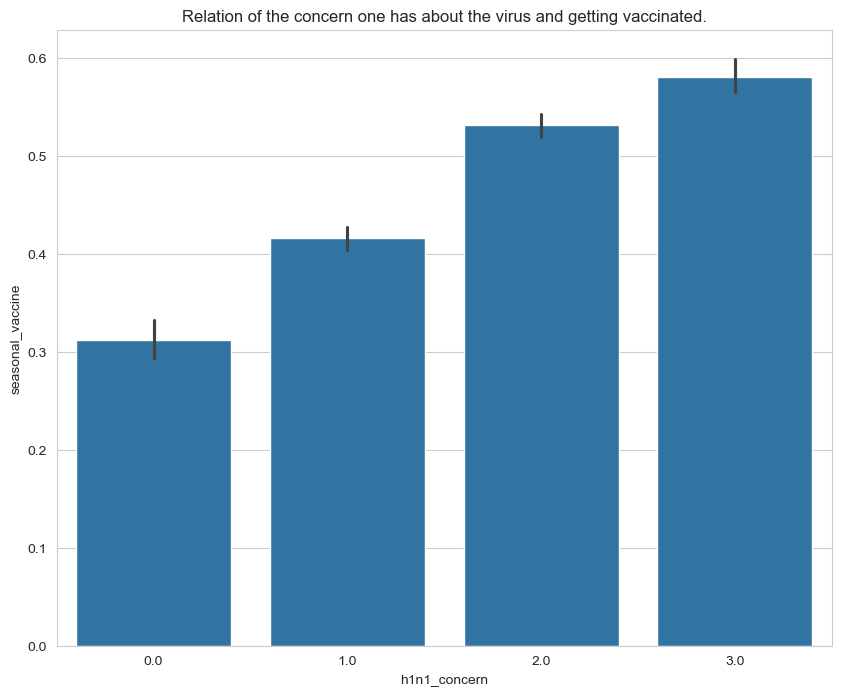

In [432]:
#relation between the concern one has about the virus and getting vaccinated
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="h1n1_concern",y="seasonal_vaccine")

ax.set_title("Relation of the concern one has about the virus and getting vaccinated.")
bar.savefig("h1n1concern.png")


> As seen the people with the most concern about the virus have a higher chance of getting the seasonal flu vaccine.

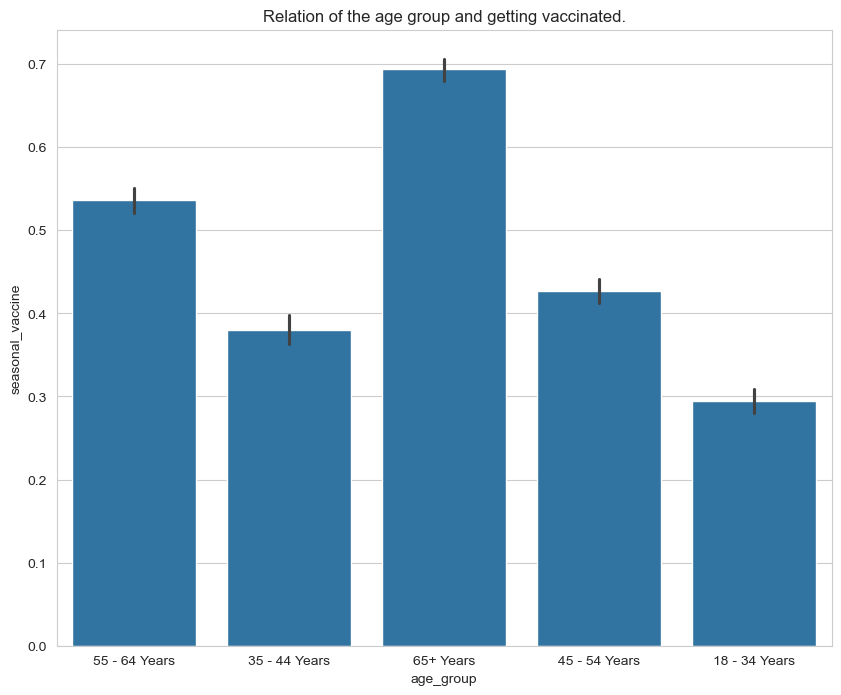

In [433]:
#relation between the age group and getting vaccinated
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="age_group",y="seasonal_vaccine")

ax.set_title("Relation of the age group and getting vaccinated.")
bar.savefig("agecorr.png")


> People over the age of 65 have received a shot of seasonal flu vaccine.

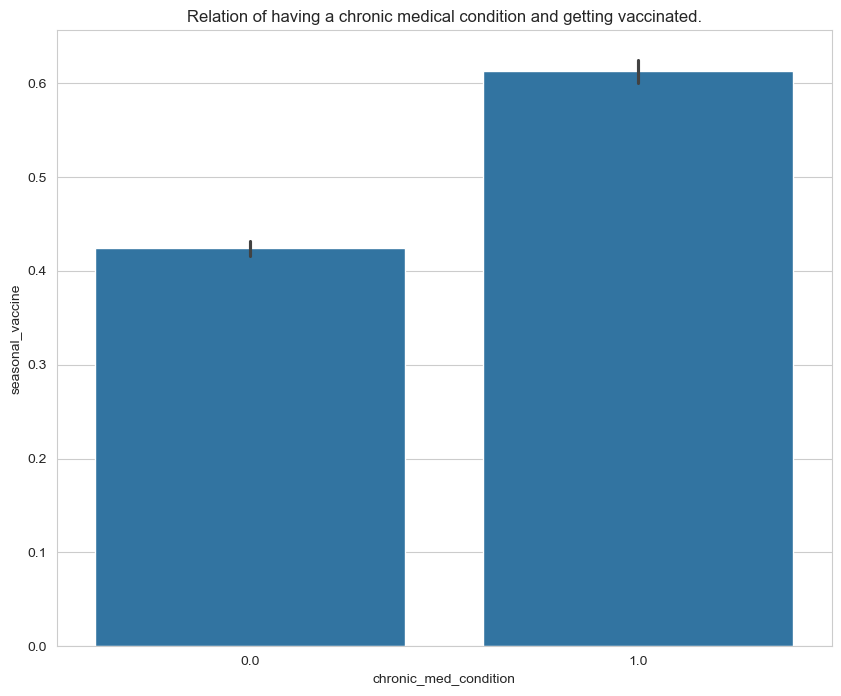

In [434]:
#relation between one having a chronic medical condition and getting vaccinated
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="chronic_med_condition",y="seasonal_vaccine")

ax.set_title("Relation of having a chronic medical condition and getting vaccinated.")
bar.savefig("chronicmedcorr.png")

> Respondents with a chronic medical condition have a higher chance of getting vaccinated.

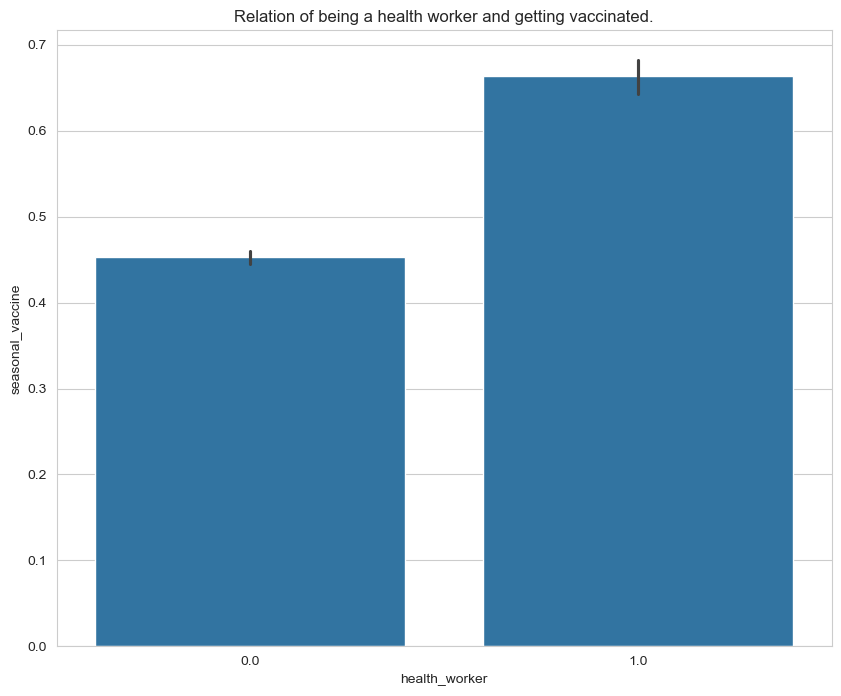

In [435]:
#Relation between being a health worker and getting a seasonal flu vaccine 
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="health_worker",y="seasonal_vaccine")

ax.set_title("Relation of being a health worker and getting vaccinated.")
bar.savefig("healthworkercorr.png")

> Due to their work environment,people working in the health care capacity are more prone to diseases,therefore they have a higher possibility of getting a seasonal flu vaccine.

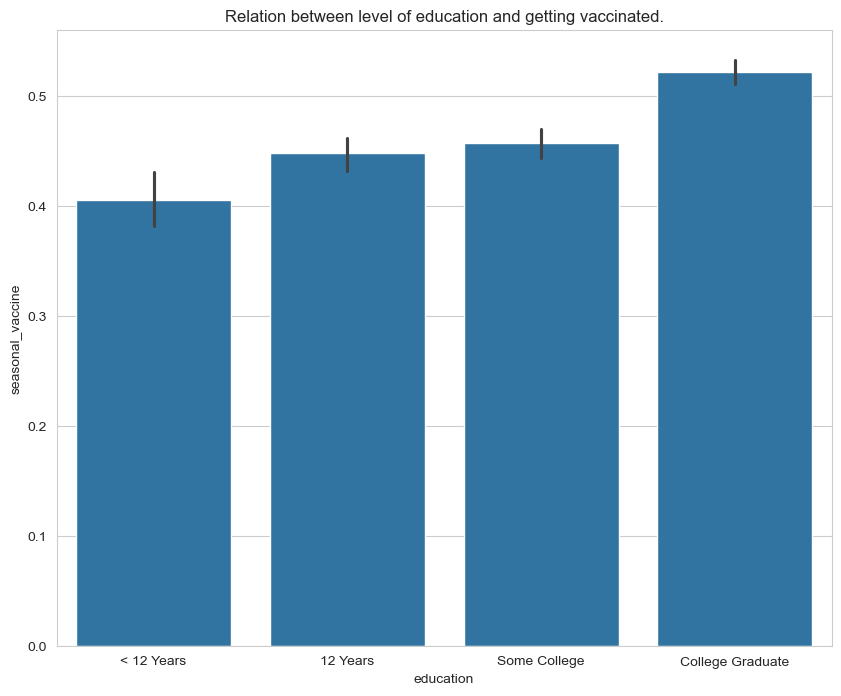

In [436]:
#Relation between level of education and getting a seasonal flu vaccine.
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="education",y="seasonal_vaccine")

ax.set_title("Relation between level of education and getting vaccinated.")
bar.savefig("healthworkercorr.png")

> As seen,people with higher education have a more likelihood of getting the seasonal flu vaccine.

### Correlations

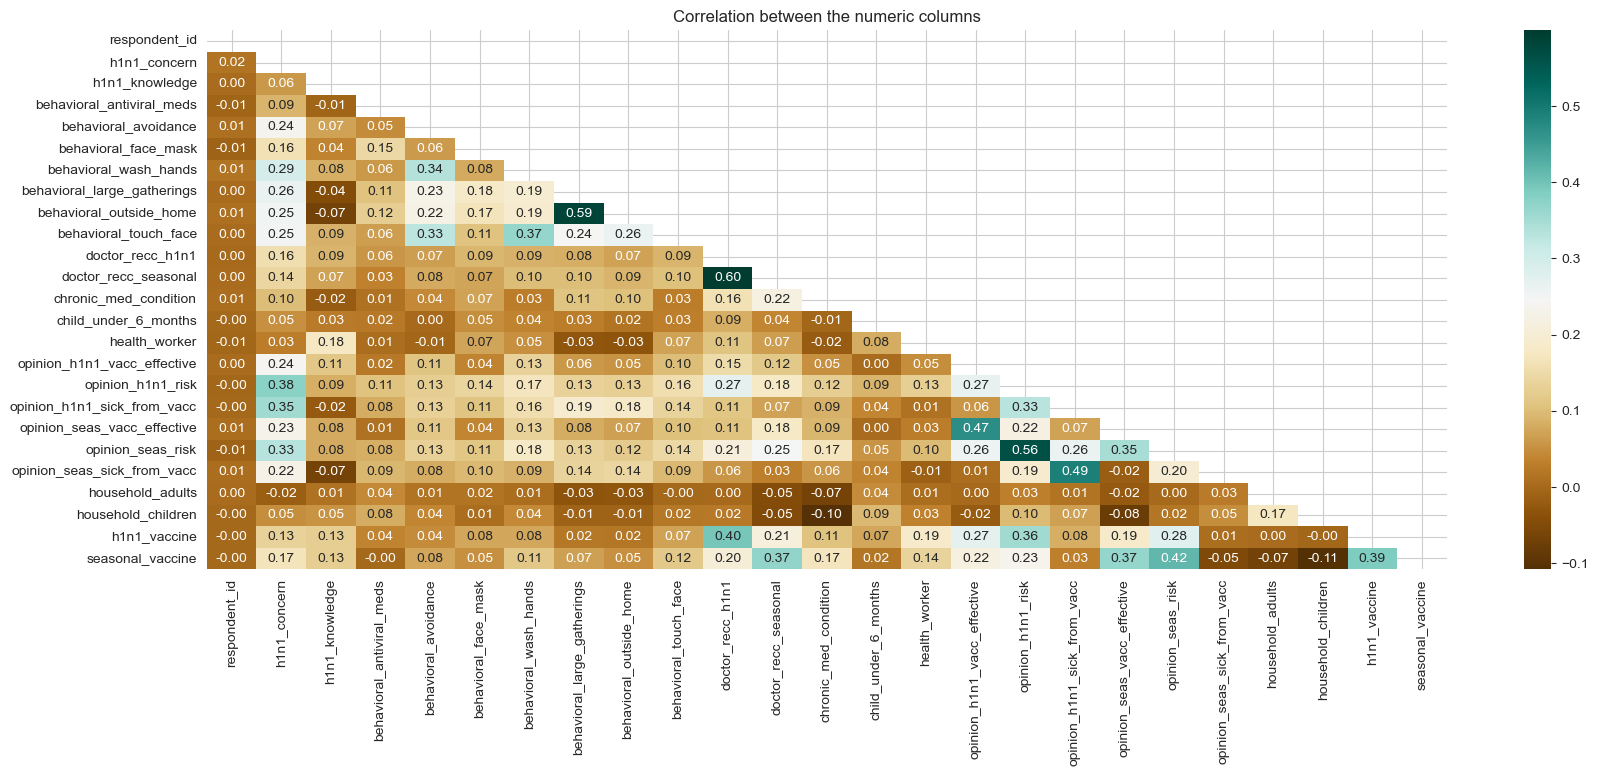

In [437]:
# Ensure that only numeric columns are used for the correlation matrix
numeric_cols = combined_train.select_dtypes(include=[np.number])  # Select only numeric columns

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 7))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask for the upper triangle
sns.heatmap(corr_matrix, annot=True, cmap="BrBG", fmt=".2f", mask=mask)  # Create the heatmap
plt.title('Correlation between the numeric columns')
plt.show()

## 3. DATA PREPARATION

### Encoding categorical data

In [438]:
#defining the categorical columns
categorical_columns = ['employment_status','age_group','education','race','sex','income_poverty','marital_status','rent_or_own',
                       'census_msa']
#initialize the label encoder
lab = LabelEncoder()

#encode all categorical columns

for column in categorical_columns:
    combined_train[column] = lab.fit_transform(combined_train[column])


### Checking for multicollinearity using VIF

In [439]:
# the independent variables set
X = combined_train.drop(labels=["seasonal_vaccine"],axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
pd.DataFrame(vif_data).sort_values(by=['VIF'], ascending=False)

,feature,VIF
15,opinion_h1n1_vacc_effective,21.992887
18,opinion_seas_vacc_effective,21.382281
23,race,9.078943
19,opinion_seas_risk,8.387860
16,opinion_h1n1_risk,7.767831
6,behavioral_wash_hands,7.681316
1,h1n1_concern,6.435400
2,h1n1_knowledge,6.396391
17,opinion_h1n1_sick_from_vacc,6.026470
4,behavioral_avoidance,4.802432


### Creating  baseline models.

> To start off,several models will be run with default setting,and decide which models to further tune.

In [440]:
# check the dummy accuracy of initial raw data
print("Raw Counts")
print(combined_train["seasonal_vaccine"].value_counts())
print()
print("Dummy accuracy")
print(combined_train["seasonal_vaccine"].value_counts(normalize=True))


Raw Counts
seasonal_vaccine
0    10254
1     9388
Name: count, dtype: int64

Dummy accuracy
seasonal_vaccine
0    0.522045
1    0.477955
Name: proportion, dtype: float64


In [441]:
#perform a train test split
X = combined_train.drop(labels=["seasonal_vaccine"],axis=1)
y = combined_train["seasonal_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 4. MODELING

In [442]:
# Instantiate different classification models
randomforest_model = RandomForestClassifier(random_state = 42)
logisticreg_model = LogisticRegression(random_state = 42)
decisiontree_model = DecisionTreeClassifier(random_state = 42)
knn_model = KNeighborsClassifier()
naivebayes_model = GaussianNB()

In [443]:
#fit the models
train_accuracy = []
test_accuracy = []
model_list = [randomforest_model,logisticreg_model, decisiontree_model, knn_model, naivebayes_model]
for i in model_list:
    i = i.fit(X_train, y_train)
    ytrain_pred = i.predict(X_train)
    ytest_pred = i.predict(X_test)
    train_accuracy.append(accuracy_score(ytrain_pred, y_train))
    test_accuracy.append(accuracy_score(ytest_pred, y_test))

In [444]:
#display train set accuracy
train_accuracy

[1.0, 0.7824094698657162, 1.0, 0.7230955259975816, 0.7648443963597021]

In [445]:
#display test set accuracy
test_accuracy

[0.7984219903283278,
 0.7887503181471113,
 0.7042504454059557,
 0.5339781114787477,
 0.7582081954695852]

### Summary of the results

- Random Forest classifier:Train accuracy:1.0,Test accuracy:0.798.
- Logistic Regression model: Train accuracy:0.782,Test accuracy:0.788.
- Decision Tree Classifier: Train accuracy:1.0,Test accuracy:0.704.
- KNN model: Train accuracy:0.723,Test accuracy:0.533.
- Naive Bayes model: Train accuracy:0.764,Test accuracy:0.758.


> The models that will be tuned are the:Random Forest model,Decision Tree classifier and the logistic regression model
.

### a) Random forest classifier

In [446]:
# Defining the range of hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}


In [447]:
# Initializing the Random Forest classifier
rf = RandomForestClassifier()

# Using GridSearchCV to perform a search over the hyperparameters set.
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'n_estimators': [10, 50, 100, 200]})

In [448]:
# The best hyperparameters and score can be obtained using the best_params_ and best_score_ attributes
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 200}
Best score: 0.8062746410085925


### b)Logistic regression model

In [449]:
# Defining the hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

In [450]:
# Initializing the logistic regression model
logistic_regression = LogisticRegression()

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 100, 'penalty': 'l2'}


In [451]:
# Use the best parameters to train the final model
logistic_regression = grid_search.best_estimator_
logistic_regression.fit(X_train, y_train)

# Evaluate the performance on the test set
accuracy = logistic_regression.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

Accuracy on test set:  0.78925935352507


### c) Decision Tree classifier

In [452]:
# Define the hyperparameters to search
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [453]:
# Initialize the decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 6, 'min_samples_split': 7}


In [454]:
# Use the best parameters to train the final model
dt = grid_search.best_estimator_
dt.fit(X_train, y_train)

# Evaluate the performance on the test set
accuracy = dt.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

Accuracy on test set:  0.787223212013235


## 5. EVALUATION

> The model with the best performance,was the Random forest classifier.A model with the best parameters will be instantiated.

In [455]:
#initialize the classifier
random_f_finalmodel = RandomForestClassifier(max_depth =20, min_samples_leaf= 2, n_estimators= 200)

In [456]:
#fit the model 
random_f_finalmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200)

In [457]:
preds = random_f_finalmodel.predict(X_test)
probs = random_f_finalmodel.predict_proba(X_test)


print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
#print(classification_report(y_test, preds, digits=3))

log loss:  0.43927281528383005
accuracy:  0.8070755917536269


> The accuracy of the final model is at 80.7%

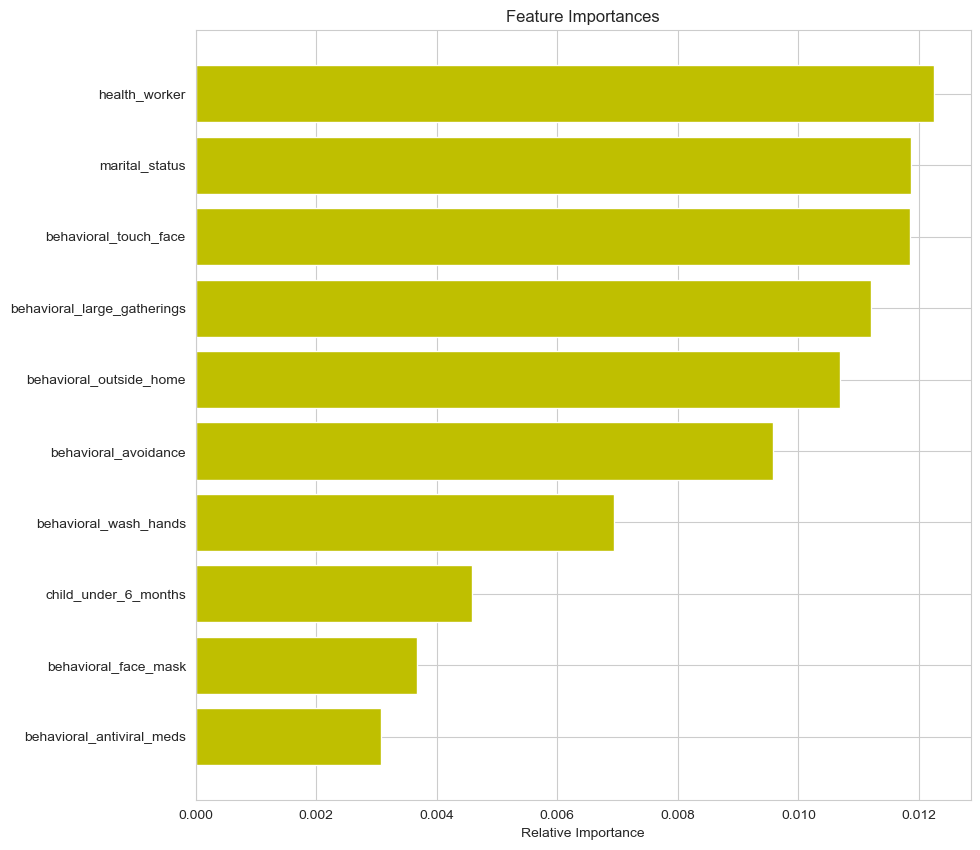

In [458]:
#visualizing best features 
features = X_train.columns
importances = random_f_finalmodel.feature_importances_
indices = np.argsort(importances)[:10]

# number of features to be displayed.
num_features = 10 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations

- From the feature importance,sex,marital status,whether one touches their face,whether one goes to large gatherings seem to stand out.


#### Interpretation
> The dummy model accuracy is 52.2%.

> The final model accuracy is 80.7%.

> This shows there was significant improvement from the dummy model.


## 6. CONCLUSION
The analysis and predictive modeling provided valuable insights into the factors influencing seasonal flu vaccine uptake. The best-performing model, a Random Forest Classifier, achieved an accuracy of 80.7%, demonstrating its reliability in identifying individuals who are likely to receive the seasonal flu vaccine. These findings address the problem statement and objectives by highlighting key drivers of vaccination behavior, offering actionable insights for public health strategies.

Key conclusions include:

1. Demographic Influences:
Individuals with higher levels of education are significantly more likely to receive the seasonal flu vaccine. This suggests that public health campaigns could benefit from targeted educational efforts to raise awareness about the importance of vaccination among populations with lower education levels.
Age plays a critical role, with people aged 65 years and older being the most likely to get vaccinated. This reflects effective targeting of this high-risk group but also underscores the need to improve outreach to younger age groups.

2. Industry and Occupational Factors:
Individuals working in the healthcare industry have a higher likelihood of getting vaccinated. This indicates that workplace vaccination programs and policies in healthcare settings are effective and could be replicated in other industries to boost vaccination rates.

3. Health and Behavioral Insights:
The model’s accuracy in predicting vaccination status highlights its potential to identify under-vaccinated groups, allowing public health officials to tailor interventions and allocate resources more effectively.

## 7. RECOMMENDATION
1. Targeted Outreach:
Develop campaigns focused on populations with lower vaccination rates, such as individuals with less formal education or those outside the healthcare industry.
2. Workplace Vaccination Programs:
Expand successful healthcare industry vaccination programs to other workplaces, emphasizing convenience and accessibility.
3. Youth Engagement:
Create specific initiatives aimed at younger age groups who may not perceive the flu vaccine as necessary, using digital media and community events to raise awareness.
4. Education Campaigns:
Emphasize the safety, efficacy, and benefits of seasonal flu vaccines through tailored educational materials, especially in communities with lower educational attainment.